In [1]:
# Importing the required packages
import numpy as np
import pandas as pd

In [2]:
# loading the data into python env
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# parse the cols with incorrect data types to correct data types
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [5]:
df.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')  # to introduce NaN whereever it is not able to parse
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

# Extract features and target

In [8]:
x = df.iloc[:,1:20]
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [9]:
y = df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

# Split the main dataset into Train and Test Sets

In [10]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=42)

In [11]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1695,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,70.70,3770.00
1095,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55
3889,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,259.65
3667,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45
2902,Female,1,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90


In [12]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10


In [13]:
ytrain.head()

1695    No
1095    No
3889    No
3667    No
2902    No
Name: Churn, dtype: object

In [14]:
ytest.head()

185     Yes
2715     No
3825     No
1807    Yes
132      No
Name: Churn, dtype: object

# Data Cleaning

## Missing Value Treatment

In [15]:
xtrain.isnull().sum()  # count the number of null values in the data colwise

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64

In [16]:
xtest.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [17]:
xtrain.shape

(4930, 19)

In [18]:
(8*100)/4930

0.16227180527383367

In [19]:
(xtrain['TotalCharges'].isnull().sum()*100)/xtrain.shape[0]

0.16227180527383367

In [20]:
xtrain['TotalCharges'] = xtrain['TotalCharges'].fillna(xtrain['TotalCharges'].mean())

In [21]:
xtrain.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [22]:
xtest['TotalCharges'] = xtest['TotalCharges'].fillna(xtrain['TotalCharges'].mean())

In [23]:
xtest.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Outlier Treatment

<AxesSubplot:>

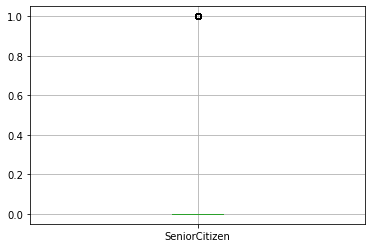

In [24]:
df.boxplot('SeniorCitizen')  # not a sensible boxplot because only 2 values in the col

<AxesSubplot:>

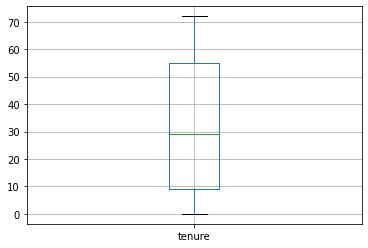

In [25]:
df.boxplot('tenure')

<AxesSubplot:>

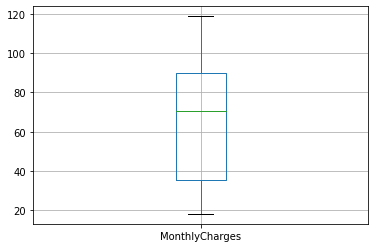

In [26]:
df.boxplot('MonthlyCharges')

<AxesSubplot:>

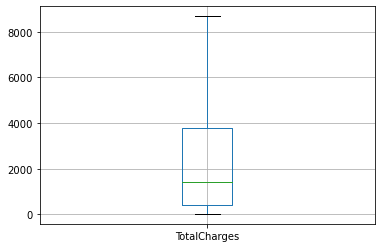

In [27]:
df.boxplot('TotalCharges')

In [28]:
out_df = pd.read_csv("winequality.csv",sep=';')
out_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<AxesSubplot:>

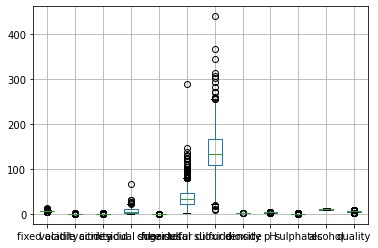

In [29]:
out_df.boxplot()

<AxesSubplot:>

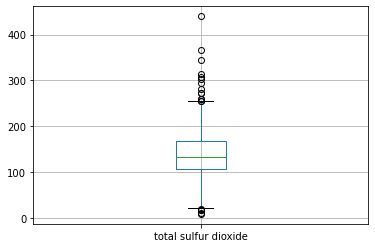

In [30]:
out_df.boxplot('total sulfur dioxide')

In [31]:
Q1 = out_df['total sulfur dioxide'].quantile(0.25)
Q3 = out_df['total sulfur dioxide'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 108.0 | Q3: 167.0 | IQR: 59.0 | LL: 19.5 | UL: 255.5


In [32]:
ul_outlier_count = out_df[out_df['total sulfur dioxide'] > UL].shape[0]
ll_outlier_count = out_df[out_df['total sulfur dioxide'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / out_df.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 14 | LL_OC: 5 | T_OC: 19 | T_OP: 0.38791343405471623


In [33]:
out_df.loc[out_df['total sulfur dioxide'] > UL] = UL
out_df.loc[out_df['total sulfur dioxide'] < LL] = LL

# the imputation has to be done for both training and testing datasets

<AxesSubplot:>

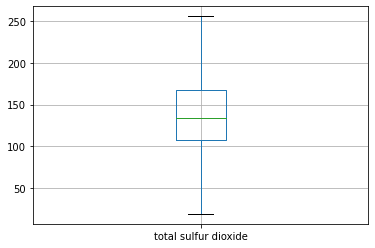

In [34]:
out_df.boxplot('total sulfur dioxide')

# Statistical Summary of the Data

In [35]:
xtrain.describe()  # by default only the summary of numerical data is given as output

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.160243,32.434280,64.795122,2290.947846
std,0.366869,24.479003,30.141247,2263.840268
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,403.562500
50%,0.000000,29.000000,70.400000,1411.500000
75%,0.000000,55.000000,89.850000,3810.150000
max,1.000000,72.000000,118.600000,8684.800000


In [36]:
xtrain.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2545,2538,3439,4463,2347,2159,2439,2140,2180,2425,1947,1928,2690,2887,1666


In [37]:
xtrain.describe(include=['int64'])

,SeniorCitizen,tenure
count,4930.000000,4930.000000
mean,0.160243,32.434280
std,0.366869,24.479003
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [38]:
xtrain.describe(include=['float64'])

,MonthlyCharges,TotalCharges
count,4930.000000,4930.000000
mean,64.795122,2290.947846
std,30.141247,2263.840268
min,18.250000,18.800000
25%,35.400000,403.562500
50%,70.400000,1411.500000
75%,89.850000,3810.150000
max,118.600000,8684.800000


In [39]:
xtrain.describe(include=['int64','float64'])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.160243,32.434280,64.795122,2290.947846
std,0.366869,24.479003,30.141247,2263.840268
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,403.562500
50%,0.000000,29.000000,70.400000,1411.500000
75%,0.000000,55.000000,89.850000,3810.150000
max,1.000000,72.000000,118.600000,8684.800000


In [40]:
xtrain.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,4930,4930.000000,4930,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,2545,NaN,2538,3439,NaN,4463,2347,2159,2439,2140,2180,2425,1947,1928,2690,2887,1666,NaN,NaN
mean,NaN,0.160243,NaN,NaN,32.434280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.795122,2290.947846
std,NaN,0.366869,NaN,NaN,24.479003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.141247,2263.840268
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.400000,403.562500
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,1411.500000
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3810.150000


# Feature Selection

## Correlation Analysis

In [41]:
import seaborn as sns

<AxesSubplot:>

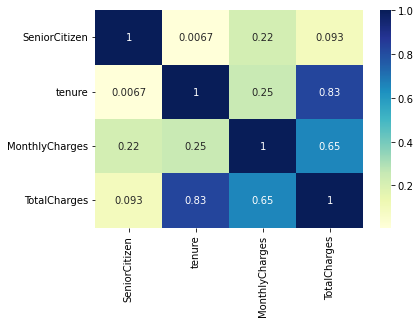

In [42]:
sns.heatmap(xtrain.corr(),annot=True,cmap='YlGnBu')
# Binary features should be correlated with other binary features

In [43]:
xtrain = xtrain.drop("TotalCharges",axis=1)
xtest = xtest.drop("TotalCharges",axis=1)

<AxesSubplot:>

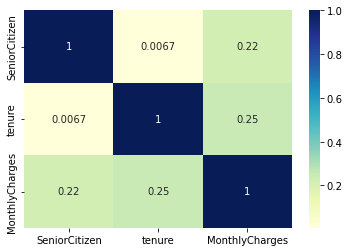

In [44]:
sns.heatmap(xtrain.corr(),annot=True,cmap='YlGnBu')  # by default the corr() gives the pearson or linear correlation

<AxesSubplot:>

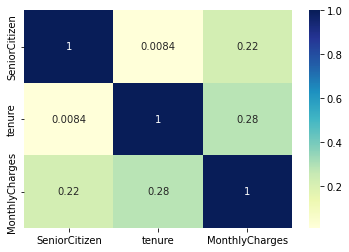

In [45]:
sns.heatmap(xtrain.corr(method="spearman"),annot=True,cmap='YlGnBu')

# Data Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [47]:
xtrain[['tenure','MonthlyCharges']].head()

,tenure,MonthlyCharges
1695,54,70.70
1095,1,80.55
3889,13,19.30
3667,24,96.55
2902,6,74.10


In [48]:
std.fit_transform(xtrain[['tenure','MonthlyCharges']])

array([[ 0.88107786,  0.19592677],
       [-1.28426262,  0.52275463],
       [-0.79399685, -1.50955058],
       ...,
       [-0.83485233, -1.44816666],
       [-0.83485233,  1.14986595],
       [-0.2628756 , -1.49296033]])

In [49]:
std.transform(xtest[['tenure','MonthlyCharges']])

array([[-1.28426262, -1.32705786],
       [ 0.34995661, -1.31212664],
       [ 0.7993669 , -1.50789155],
       ...,
       [ 1.12621075, -0.14251426],
       [-0.50800848,  0.85953664],
       [-0.42629752, -0.45441089]])

## MinMaxScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler
m2s = MinMaxScaler()

In [51]:
m2s.fit_transform(xtrain[['tenure','MonthlyCharges']])

array([[0.75      , 0.52267065],
       [0.01388889, 0.62082711],
       [0.18055556, 0.01046338],
       ...,
       [0.16666667, 0.02889885],
       [0.16666667, 0.80916791],
       [0.36111111, 0.01544594]])

In [52]:
m2s.transform(xtest[['tenure','MonthlyCharges']])

array([[0.01388889, 0.06527155],
       [0.56944444, 0.06975585],
       [0.72222222, 0.01096163],
       ...,
       [0.83333333, 0.42102641],
       [0.27777778, 0.72197309],
       [0.30555556, 0.32735426]])

In [53]:
xtrain_scaled = m2s.fit_transform(xtrain[['tenure','MonthlyCharges']])
xtrain_scaled

array([[0.75      , 0.52267065],
       [0.01388889, 0.62082711],
       [0.18055556, 0.01046338],
       ...,
       [0.16666667, 0.02889885],
       [0.16666667, 0.80916791],
       [0.36111111, 0.01544594]])

In [54]:
xtrain_scaled = pd.DataFrame(xtrain_scaled)
xtrain_scaled

,0,1
0,0.750000,0.522671
1,0.013889,0.620827
2,0.180556,0.010463
3,0.333333,0.780269
4,0.083333,0.556552
...,...,...
4925,0.013889,0.764823
4926,0.319444,0.725959
4927,0.166667,0.028899
4928,0.166667,0.809168


In [55]:
xtrain['tenure'] = xtrain_scaled.iloc[:,0]
xtrain['MonthlyCharges'] = xtrain_scaled.iloc[:,1]
# TODO: same thing needs to be applied to testing data as well

In [56]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1695,Male,0,Yes,Yes,0.027778,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,0.013951
1095,Male,0,No,No,0.055556,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0.202292
3889,Male,0,No,No,0.291667,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0.013453
3667,Female,1,Yes,Yes,0.013889,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,0.634778
2902,Female,1,No,No,0.513889,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.775785


# Encoding - Converting the categorical data into numeric data

In [57]:
data = {
    "male":[0,0,1,0,1,1,0,0,0,1],
    "female":[1,1,0,1,0,0,1,1,1,0]
       }
gender = pd.DataFrame(data)
gender

,male,female
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,0,1
9,1,0


<AxesSubplot:>

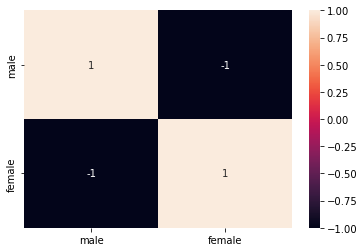

In [58]:
sns.heatmap(gender.corr(),annot=True)

In [59]:
data = {
    "categoryA":[0,0,1,0,0,1,0,0,0,1],
    "categoryB":[0,1,0,1,0,0,0,1,1,0]
       }
nominal_data = pd.DataFrame(data)
nominal_data

,categoryA,categoryB
0,0,0
1,0,1
2,1,0
3,0,1
4,0,0
5,1,0
6,0,0
7,0,1
8,0,1
9,1,0


<AxesSubplot:>

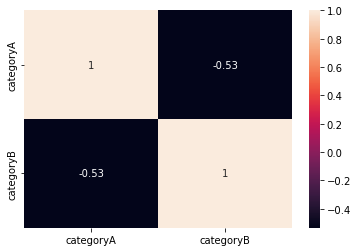

In [60]:
sns.heatmap(nominal_data.corr(),annot=True)

In [61]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1695,Male,0,Yes,Yes,0.027778,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,0.013951
1095,Male,0,No,No,0.055556,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0.202292
3889,Male,0,No,No,0.291667,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0.013453
3667,Female,1,Yes,Yes,0.013889,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,0.634778
2902,Female,1,No,No,0.513889,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.775785


In [62]:
xtrain['gender'] = xtrain['gender'].map({"Female":1,"Male":0})
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1695,0,0,Yes,Yes,0.027778,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,0.013951
1095,0,0,No,No,0.055556,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0.202292
3889,0,0,No,No,0.291667,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0.013453
3667,1,1,Yes,Yes,0.013889,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,0.634778
2902,1,1,No,No,0.513889,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.775785


In [63]:
xtrain.describe(include=['object'])

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2538,3439,4463,2347,2159,2439,2140,2180,2425,1947,1928,2690,2887,1666


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
le.fit_transform(xtrain['Partner'])

array([1, 0, 0, ..., 1, 0, 0])

In [66]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1695,0,0,Yes,Yes,0.027778,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,0.013951
1095,0,0,No,No,0.055556,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0.202292
3889,0,0,No,No,0.291667,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0.013453
3667,1,1,Yes,Yes,0.013889,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,0.634778
2902,1,1,No,No,0.513889,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.775785


In [67]:
xtrain['Partner'] = le.fit_transform(xtrain['Partner'])
xtrain['Dependents'] = le.fit_transform(xtrain['Dependents'])
xtrain['PhoneService'] = le.fit_transform(xtrain['PhoneService'])
xtrain['PaperlessBilling'] = le.fit_transform(xtrain['PaperlessBilling'])
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1695,0,0,1,1,0.027778,1,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,1,Electronic check,0.013951
1095,0,0,0,0,0.055556,1,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,1,Electronic check,0.202292
3889,0,0,0,0,0.291667,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Credit card (automatic),0.013453
3667,1,1,1,1,0.013889,1,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,1,Electronic check,0.634778
2902,1,1,0,0,0.513889,1,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,0.775785


In [68]:
xtrain.describe(include=['object'])

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,3,3,3,3,3,3,3,3,3,4
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,2347,2159,2439,2140,2180,2425,1947,1928,2690,1666


In [69]:
xtrain['MultipleLines'].value_counts()

No                  2347
Yes                 2116
No phone service     467
Name: MultipleLines, dtype: int64

In [70]:
xtrain['InternetService'].value_counts()

Fiber optic    2159
DSL            1694
No             1077
Name: InternetService, dtype: int64

In [71]:
xtrain['OnlineSecurity'].value_counts()

No                     2439
Yes                    1414
No internet service    1077
Name: OnlineSecurity, dtype: int64

In [72]:
xtrain['OnlineBackup'].value_counts()

No                     2140
Yes                    1713
No internet service    1077
Name: OnlineBackup, dtype: int64

In [73]:
xtrain['DeviceProtection'].value_counts()

No                     2180
Yes                    1673
No internet service    1077
Name: DeviceProtection, dtype: int64

In [74]:
xtrain['TechSupport'].value_counts()

No                     2425
Yes                    1428
No internet service    1077
Name: TechSupport, dtype: int64

In [75]:
xtrain['StreamingTV'].value_counts()

No                     1947
Yes                    1906
No internet service    1077
Name: StreamingTV, dtype: int64

In [76]:
xtrain['StreamingMovies'].value_counts()

No                     1928
Yes                    1925
No internet service    1077
Name: StreamingMovies, dtype: int64

In [77]:
xtrain['Contract'].value_counts()

Month-to-month    2690
Two year          1186
One year          1054
Name: Contract, dtype: int64

In [78]:
xtrain['PaymentMethod'].value_counts()

Electronic check             1666
Mailed check                 1113
Bank transfer (automatic)    1086
Credit card (automatic)      1065
Name: PaymentMethod, dtype: int64

In [79]:
pd.get_dummies(xtrain['InternetService'])

,DSL,Fiber optic,No
1695,1,0,0
1095,0,1,0
3889,0,0,1
3667,0,1,0
2902,0,1,0
...,...,...,...
3772,0,1,0
5191,1,0,0
5226,0,0,1
5390,0,1,0


In [80]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1695,0,0,1,1,0.027778,1,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,1,Electronic check,0.013951
1095,0,0,0,0,0.055556,1,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,1,Electronic check,0.202292
3889,0,0,0,0,0.291667,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Credit card (automatic),0.013453
3667,1,1,1,1,0.013889,1,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,1,Electronic check,0.634778
2902,1,1,0,0,0.513889,1,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,0.775785


In [81]:
InternetServiceDummies = pd.get_dummies(xtrain['InternetService'])
xtrain = xtrain.drop("InternetService",axis=1)
xtrain['DSL'] = InternetServiceDummies['DSL']
xtrain['Fiber optic'] = InternetServiceDummies['Fiber optic']
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,DSL,Fiber optic
1695,0,0,1,1,0.027778,1,Yes,No,Yes,No,Yes,Yes,No,One year,1,Electronic check,0.013951,1,0
1095,0,0,0,0,0.055556,1,No,No,No,No,No,Yes,No,Month-to-month,1,Electronic check,0.202292,0,1
3889,0,0,0,0,0.291667,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Credit card (automatic),0.013453,0,0
3667,1,1,1,1,0.013889,1,No,No,No,Yes,No,Yes,Yes,Two year,1,Electronic check,0.634778,0,1
2902,1,1,0,0,0.513889,1,No,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,0.775785,0,1


In [82]:
xtrain['MultipleLines'] = xtrain['MultipleLines'].map({"No":0,"No phone service":0,"Yes":1})
xtrain['OnlineSecurity'] = xtrain['OnlineSecurity'].map({"No":0,"No internet service":0,"Yes":1})
xtrain['OnlineBackup'] = xtrain['OnlineBackup'].map({"No":0,"No internet service":0,"Yes":1})
xtrain['DeviceProtection'] = xtrain['DeviceProtection'].map({"No":0,"No internet service":0,"Yes":1})
xtrain['TechSupport'] = xtrain['TechSupport'].map({"No":0,"No internet service":0,"Yes":1})
xtrain['StreamingTV'] = xtrain['StreamingTV'].map({"No":0,"No internet service":0,"Yes":1})
xtrain['StreamingMovies'] = xtrain['StreamingMovies'].map({"No":0,"No internet service":0,"Yes":1})
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,DSL,Fiber optic
1695,0,0,1,1,0.027778,1,1,0,1,0,1,1,0,One year,1,Electronic check,0.013951,1,0
1095,0,0,0,0,0.055556,1,0,0,0,0,0,1,0,Month-to-month,1,Electronic check,0.202292,0,1
3889,0,0,0,0,0.291667,1,0,0,0,0,0,0,0,One year,0,Credit card (automatic),0.013453,0,0
3667,1,1,1,1,0.013889,1,0,0,0,1,0,1,1,Two year,1,Electronic check,0.634778,0,1
2902,1,1,0,0,0.513889,1,0,1,0,0,0,0,0,Month-to-month,1,Electronic check,0.775785,0,1


In [83]:
xtrain['Contract'] = le.fit_transform(xtrain['Contract'])
# xtest['Contract'] = le.transform(xtest['Contract'])
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,DSL,Fiber optic
1695,0,0,1,1,0.027778,1,1,0,1,0,1,1,0,1,1,Electronic check,0.013951,1,0
1095,0,0,0,0,0.055556,1,0,0,0,0,0,1,0,0,1,Electronic check,0.202292,0,1
3889,0,0,0,0,0.291667,1,0,0,0,0,0,0,0,1,0,Credit card (automatic),0.013453,0,0
3667,1,1,1,1,0.013889,1,0,0,0,1,0,1,1,2,1,Electronic check,0.634778,0,1
2902,1,1,0,0,0.513889,1,0,1,0,0,0,0,0,0,1,Electronic check,0.775785,0,1


In [84]:
PaymentMethodDummies = pd.get_dummies(xtrain['PaymentMethod'])
PaymentMethodDummies

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
1695,0,0,1,0
1095,0,0,1,0
3889,0,1,0,0
3667,0,0,1,0
2902,0,0,1,0
...,...,...,...,...
3772,0,0,1,0
5191,0,1,0,0
5226,0,0,1,0
5390,0,0,1,0


In [85]:
xtrain = xtrain.drop('PaymentMethod',axis=1)
xtrain['Electronic check'] = PaymentMethodDummies['Electronic check']
xtrain['Mailed check'] = PaymentMethodDummies['Mailed check']
xtrain['Credit card'] = PaymentMethodDummies['Credit card (automatic)']
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,DSL,Fiber optic,Electronic check,Mailed check,Credit card
1695,0,0,1,1,0.027778,1,1,0,1,0,...,1,0,1,1,0.013951,1,0,1,0,0
1095,0,0,0,0,0.055556,1,0,0,0,0,...,1,0,0,1,0.202292,0,1,1,0,0
3889,0,0,0,0,0.291667,1,0,0,0,0,...,0,0,1,0,0.013453,0,0,0,0,1
3667,1,1,1,1,0.013889,1,0,0,0,1,...,1,1,2,1,0.634778,0,1,1,0,0
2902,1,1,0,0,0.513889,1,0,1,0,0,...,0,0,0,1,0.775785,0,1,1,0,0


In [86]:
ytrain

1695     No
1095     No
3889     No
3667     No
2902     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 4930, dtype: object

In [87]:
ytrain = le.fit_transform(ytrain)
ytrain

array([0, 0, 0, ..., 0, 1, 0])